In [2]:
import pandas as pd, numpy as np

# Operating on Data in Pandas

Pandas is designed to work with numpy. Thus we can use the ufunc functionality to work with pandas and make instruction execution more efficient.

In [3]:
np.random.seed()

In [113]:
rng=np.random.RandomState(41)#setting random seed
print(rng)
rng.seed
ser=pd.Series(rng.randint(0,10,4))#series with 4 entries
ser

RandomState(MT19937)


0    0
1    3
2    2
3    0
dtype: int32

In [5]:
df=pd.DataFrame(rng.randint(0,10,(3,4)),columns=['A','B','C','D'],index=['1','2','3'])
df

,A,B,C,D
1,1,3,9,7
2,5,8,3,3
3,2,6,0,4


In [6]:
print(np.exp(ser))#e^ser would do exactly what it would do if the argument was a numpy array
print(ser)

0     1.000000
1    20.085537
2     7.389056
3     1.000000
dtype: float64
0    0
1    3
2    2
3    0
dtype: int32


In [7]:
np.sin(df*np.pi/4)

,A,B,C,D
1,0.707107,7.071068e-01,0.707107,-7.071068e-01
2,-0.707107,-2.449294e-16,0.707107,7.071068e-01
3,1.000000,-1.000000e+00,0.000000,1.224647e-16


## Index Alignment

operating two dataframes or two series, Pandas will align the indeces/entries/rows/ in the process of performing the operation very conviniently.

### Alignment in Series

In [8]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,'California': 423967})
population = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127})

Say we want to find the population density. We can do so by dividing the two series defined above. The row alignment would be done automatically

In [9]:
print(population/area)

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64


Notice how it fills some entries with NaN. We can choose to replace the NaN values such that values of one array are operated with a fill value instead of non existant values.

In [10]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [11]:
A.add(B,fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Alignment in DataFrame

In [12]:
A=pd.DataFrame(rng.randint(0,20,(2,2)),columns=['A','B'])
A

,A,B
0,9,19
1,11,17


In [13]:
B=pd.DataFrame(rng.randint(0,10,(3,3)),columns=['B','A','C'])
B

,B,A,C
0,5,2,1
1,5,3,2
2,4,1,2


In [14]:
A+B

,A,B,C
0,11.0,24.0,NaN
1,14.0,22.0,NaN
2,NaN,NaN,NaN


Notice how the entries of the sum are automatically aligned row-wise and column-wise

We can fill up the NaN entries such that,all entries of one array operate with the mean of A instead of operating with some non existant entry.

In [15]:
themean=np.mean(A)
A.add(B,fill_value=themean)

,A,B,C
0,11.0,24.0,15.0
1,14.0,22.0,16.0
2,15.0,18.0,16.0


In [16]:
A#A.add(B) doesn't change the value of A

,A,B
0,9,19
1,11,17


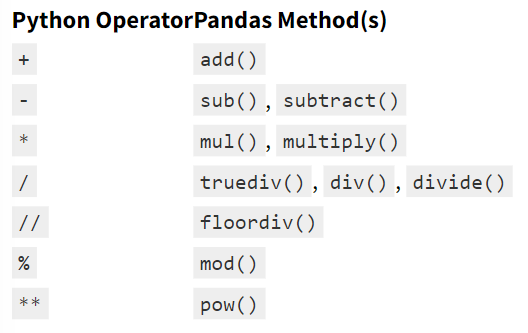

### Alignment in operatioons b/w Series and DataFrames

Consider this operation where we find the difference between a 2dimensional array and one of it's rows

In [114]:
A=rng.randint(10,size=(3,4))
A

array([[1, 3, 9, 7],
       [5, 8, 3, 3],
       [2, 6, 0, 4]])

In [18]:
A-A[0]

array([[ 0,  0,  0,  0],
       [ 2,  3,  1, -2],
       [ 1,  1,  3,  0]])

Clearly what's happening here is that A[0] is being subtracted from every row of the array A. This works the same way in pandas as well.

In [19]:
df=pd.DataFrame(A,columns=list('QRST'))
df-df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,2,3,1,-2
2,1,1,3,0


Say instead of operation row-wise we want to operate column-wise, we could do so by using the list of functions mentioned previously

In [20]:
df.subtract(df['R'],axis=0)

,Q,R,S,T
0,-1,0,1,0
1,-2,0,-1,-5
2,-1,0,3,-1


In [27]:
print(df.iloc[0,::2])
df

Q    3
S    5
Name: 0, dtype: int32


,Q,R,S,T
0,3,4,5,4
1,5,7,6,2
2,4,5,8,4


In [127]:
rng=np.random.RandomState(41)#setting random seed
Demo=[[rng.randint(1000) for i in range(10)] for j in range(10)]
Demo=pd.DataFrame(Demo,index=[i for i in range(1,11)], columns=['A','B','C','D','E','F','G','H','I','J'])
Demo

,A,B,C,D,E,F,G,H,I,J
1,960,931,908,994,80,321,243,601,407,469
2,282,877,236,440,131,675,178,198,84,854
3,957,105,179,476,856,715,92,692,439,145
4,245,122,738,465,796,309,531,653,701,890
5,991,674,442,772,827,641,76,12,626,163
6,132,453,148,5,999,637,172,918,418,430
7,621,996,235,606,543,189,277,863,367,392
8,180,74,102,826,641,724,78,201,585,974
9,21,269,271,178,4,804,93,863,420,659
10,688,395,877,903,637,730,413,245,47,434


In [131]:
Demo.iloc[0,::2]

A    960
C    908
E     80
G    243
I    407
Name: 1, dtype: int64

In [132]:
Demo-Demo.iloc[0,::2]

,A,B,C,D,E,F,G,H,I,J
1,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,-678.0,NaN,-672.0,NaN,51.0,NaN,-65.0,NaN,-323.0,NaN
3,-3.0,NaN,-729.0,NaN,776.0,NaN,-151.0,NaN,32.0,NaN
4,-715.0,NaN,-170.0,NaN,716.0,NaN,288.0,NaN,294.0,NaN
5,31.0,NaN,-466.0,NaN,747.0,NaN,-167.0,NaN,219.0,NaN
6,-828.0,NaN,-760.0,NaN,919.0,NaN,-71.0,NaN,11.0,NaN
7,-339.0,NaN,-673.0,NaN,463.0,NaN,34.0,NaN,-40.0,NaN
8,-780.0,NaN,-806.0,NaN,561.0,NaN,-165.0,NaN,178.0,NaN
9,-939.0,NaN,-637.0,NaN,-76.0,NaN,-150.0,NaN,13.0,NaN
10,-272.0,NaN,-31.0,NaN,557.0,NaN,170.0,NaN,-360.0,NaN
